/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/wave.png


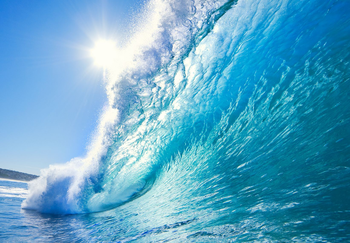

(243, 350, 3)

In [15]:
# USAGE
# python 3d_histogram.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any
from mpl_toolkits.mplot3d import Axes3D

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/wave.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")
args["size"] = float(5000)
args["bins"] = int(4)
size = args["size"]
bins = args["bins"]

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

image.shape



3D histogram shape: (4, 4, 4), with 64 values


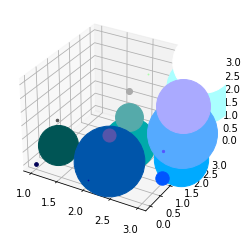

In [16]:

# compute the color histogram for the input image
hist = cv2.calcHist(
    [image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256]
)

# show the shape of the hostgram
print("3D histogram shape: %s, with %d values" % (hist.shape, hist.flatten().shape[0]))

# initialize our figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# find the largest value in our histogram and then compute the ratio
# of our largest size bin to the largest in the histogram
ratio = size / np.max(hist)

# loop over the histogram planes
for (x, plane) in enumerate(hist):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row):
            # ensure that there is a value in the current bin
            if hist[x][y][z] > 0.0:
                # plot the bin
                siz = ratio * hist[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s=siz, facecolors=rgb)

# show the figures
plt.show()
